In [35]:
!pip install yfinance

     -------------------------------------- 59.2/59.2 KB 391.5 kB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 499.4/499.4 KB 3.1 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rasa 3.1.0 requires packaging<21.0,>=20.0, but you have packaging 21.3 which is incompatible.
rasa 3.1.0 requires pytz<2022.0,>=2019.1, but you have pytz 2022.7.1 which is incompatible.
rasa 3.1.0 requires typing-extensions<4.0.0,>=3.7.4, but you have typing-extensions 4.2.0 which is incompatible.
You should consider upgrading via the 'c:\users\waleed\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
#Importing the required libraries

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [1]:
import datetime

In [3]:
# Get user input for stock symbol and prediction end date
stock_name = input("Enter stock symbol: ")

# pred_end_date = input("Enter prediction end date (yyyy-mm-dd): ")

# Get the current date
current_date = datetime.datetime.now().date()

# Subtract one day to get the end date
pred_end_date = current_date - datetime.timedelta(days=1)

# Convert the date to a string in the yyyy-mm-dd format
pred_end_date_str = pred_end_date.strftime('%Y-%m-%d')

In [4]:
# Download historical data
df = yf.download(stock_name, start="2015-01-01", end=pred_end_date_str)

# Preprocessing data
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8)) # 80% training data

[*********************100%***********************]  1 of 1 completed


In [5]:
# Scaling data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [6]:
# Create training dataset
train_data = scaled_data[0:training_data_len, :]

In [7]:
# Split data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [8]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train data to be 3-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [9]:
# Build LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(1))

In [10]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
# Train model
model.fit(x_train, y_train, batch_size=4, epochs=2)


Epoch 1/2
395/395 [==============================] - 33s 73ms/step - loss: 3.4007e-04
Epoch 2/2
395/395 [==============================] - 28s 70ms/step - loss: 2.9868e-04


In [20]:
# Create testing dataset
test_data = scaled_data[training_data_len - 60: , :]


In [21]:
# Split data into x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to numpy array
x_test = np.array(x_test)

In [22]:
# Reshape x_test data to be 3-dimensional
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [23]:
# Get model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get dates for the next 30 days
future_dates = pd.date_range(start=pred_end_date, periods=30)

# Print predicted stock prices for next 30 days with dates
print(f'Predicted stock prices of {stock_name} for the next 30 days:')
for i in range(len(predictions)):
    if i >= 30:
        break
    print(f'{future_dates[i].date()}: {predictions[i][0]}')



# Calculate root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)

Predicted stock prices of AAPL for the next 30 days:
2023-02-17: 133.1282196044922
2023-02-18: 133.97698974609375
2023-02-19: 135.0436553955078
2023-02-20: 136.069580078125
2023-02-21: 137.03555297851562
2023-02-22: 137.8191680908203
2023-02-23: 138.4554901123047
2023-02-24: 139.16209411621094
2023-02-25: 139.84954833984375
2023-02-26: 140.31500244140625
2023-02-27: 140.30433654785156
2023-02-28: 140.16238403320312
2023-03-01: 139.9698486328125
2023-03-02: 139.88076782226562
2023-03-03: 140.01673889160156
2023-03-04: 140.3446807861328
2023-03-05: 140.62442016601562
2023-03-06: 140.68540954589844
2023-03-07: 140.59942626953125
2023-03-08: 140.45127868652344
2023-03-09: 140.27708435058594
2023-03-10: 140.22947692871094
2023-03-11: 140.27748107910156
2023-03-12: 140.388427734375
2023-03-13: 140.46502685546875
2023-03-14: 140.4878692626953
2023-03-15: 140.4364776611328
2023-03-16: 140.3534393310547
2023-03-17: 140.45550537109375
2023-03-18: 140.7266845703125


In [24]:
pred_date = input("Enter prediction date (yyyy-mm-dd): ")
# Print predicted stock price for given date
print(f"Predicted stock price of {stock_name} for {pred_date}: {predictions[0][0]}")

Predicted stock price of AAPL for 2023-03-19: 133.1282196044922


C:\Users\Waleed\AppData\Local\Temp/ipykernel_2672/146613757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


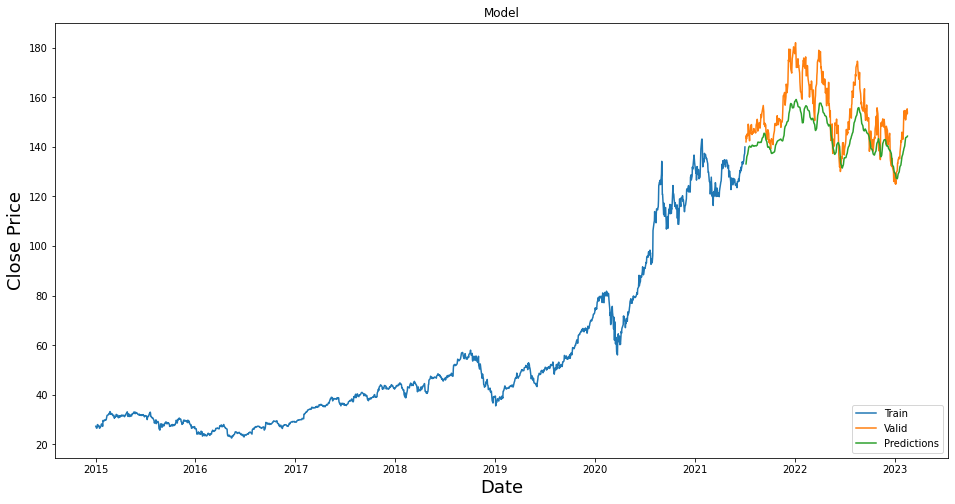

In [25]:
# Plot actual and predicted stock prices
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [29]:
print(valid[['Close', 'Predictions']])

                 Close  Predictions
Date                               
2021-07-06  142.020004   133.128220
2021-07-07  144.570007   133.976990
2021-07-08  143.240005   135.043655
2021-07-09  145.110001   136.069580
2021-07-12  144.500000   137.035553
...                ...          ...
2023-02-10  151.009995   143.768890
2023-02-13  153.850006   143.894287
2023-02-14  153.199997   143.995361
2023-02-15  155.330002   144.093857
2023-02-16  153.710007   144.327148

[409 rows x 2 columns]
